In [ ]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-16/12/19
#Clasificar habla imaginada en EEG con CNN-1D + LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, Dropout, LSTM, Dense

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [5]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [7]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 1, 6, 512))
print(x.shape)

(132, 1, 6, 512)


In [8]:
x = np.transpose(x, (0,1,3,2))

print(x.shape)

(132, 1, 512, 6)


In [9]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [31]:
model = Sequential()
model.add(TimeDistributed(Conv1D(32, 7, activation='relu'), input_shape=(None,512,6)))
model.add(TimeDistributed(Conv1D(64, 7, activation='relu')))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(16))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_11 (TimeDis (None, None, 506, 32)     1376      
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 500, 64)     14400     
_________________________________________________________________
time_distributed_13 (TimeDis (None, None, 32000)       0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
__________

In [34]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 1s 11ms/sample - loss: 1.7989 - acc: 0.1717 - val_loss: 1.7821 - val_acc: 0.1212
Epoch 2/20
99/99 [==============================] - 0s 722us/sample - loss: 1.7901 - acc: 0.2121 - val_loss: 1.7821 - val_acc: 0.2121
Epoch 3/20
99/99 [==============================] - 0s 683us/sample - loss: 1.7321 - acc: 0.2929 - val_loss: 1.8035 - val_acc: 0.1515
Epoch 4/20
99/99 [==============================] - 0s 697us/sample - loss: 1.6923 - acc: 0.3636 - val_loss: 1.7795 - val_acc: 0.1818
Epoch 5/20
99/99 [==============================] - 0s 701us/sample - loss: 1.5776 - acc: 0.4141 - val_loss: 1.8071 - val_acc: 0.2121
Epoch 6/20
99/99 [==============================] - 0s 675us/sample - loss: 1.5632 - acc: 0.4242 - val_loss: 1.8098 - val_acc: 0.2121
Epoch 7/20
99/99 [==============================] - 0s 685us/sample - loss: 1.5311 - acc: 0.3636 - val_loss: 1.8005 - val_acc: 0.2121
Epoch 8/20
99/99 [=

In [35]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 335us/sample - loss: 1.8459 - acc: 0.2121
Test loss: 1.8458885965925274
Test accuracy: 0.21212122


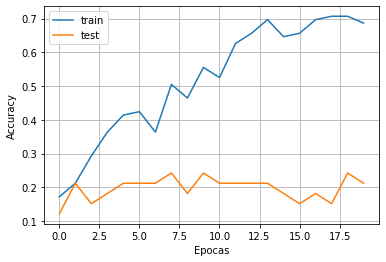

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

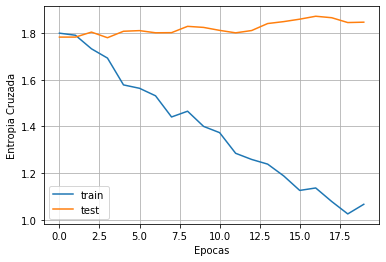

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()